<a href="https://colab.research.google.com/github/SRIKARREDDY-dotorg/Hand-Written-hindi-script-recognition/blob/master/EDA_on_IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### THE SPARKS FOUNDATION                                                                           
**DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP**



---


> **TASK : Exploratory Data Analysis - Sports**<br>

> *Perform Exploratory Data Analysis on IPL Dataset*

>>>>>**AUTHOR** :<br> POCHANA SRIKAR REDDY

>> 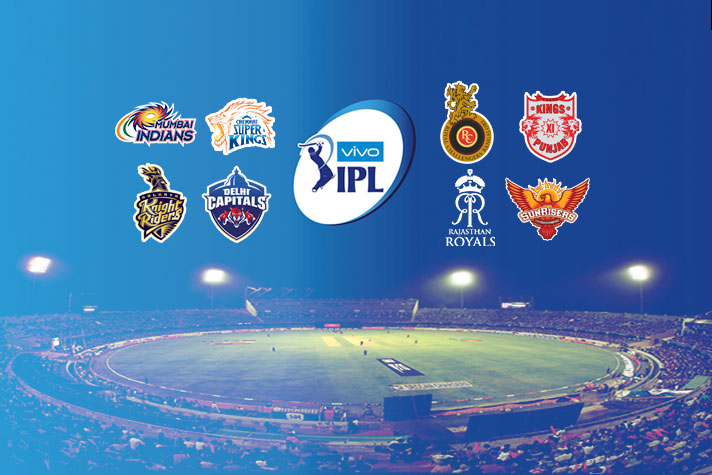




In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#dataset stored in drive accessing through drive

Mounted at /content/drive


In [ ]:
# importing the necessary modules for the task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
deliver_data = pd.read_csv("/content/drive/MyDrive/TSF_IPL_DATASET/deliveries.csv")

In [ ]:
matches_data = pd.read_csv("/content/drive/MyDrive/TSF_IPL_DATASET/matches.csv")
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

There are null values present in columns:- 
1. city
2. winner
3. player_of_match
4. Umpire1,Umpire2, Umpire3

In [ ]:
# Since more number of null values with third umpire column we can remove it
matches_data.drop(columns=['umpire3'],inplace=True)

In [ ]:
matches_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


Fill null values with empty
City, umpire1, umpire2 have the null values

In [ ]:
matches_data.city = matches_data.city.fillna("empty")

In [ ]:
matches_data.umpire1 = matches_data.umpire1.fillna("empty")
matches_data.umpire2 = matches_data.umpire2.fillna("empty")

In [ ]:
print(matches_data['team1'].unique())

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


In [ ]:
print(matches_data['team2'].unique())

['Royal Challengers Bangalore' 'Rising Pune Supergiant'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Daredevils'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions' 'Rajasthan Royals'
 'Chennai Super Kings' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Rising Pune Supergiants' 'Delhi Capitals']


from the above observations we see that Rising pune supergiant is mispelled and became two categories. Pune warriors and Rising pune supergaints are same teams. Similarly decca chargers and sunrisers hyderabad are same and Delhi daredevils, delhi capitals are same.


In [ ]:
matches_data=matches_data.replace("Rising Pune Supergiants","Rising Pune Supergiant")
matches_data=matches_data.replace("Pune Warriors","Rising Pune Supergiant")
matches_data=matches_data.replace("Deccan Chargers","Sunrisers Hyderabad")
matches_data=matches_data.replace("Delhi Capitals","Delhi Daredevils")

In [ ]:
rows_withnull = matches_data[matches_data.isnull().any(axis=1)]
rows_withnull

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Rising Pune Supergiant,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


Number of seasons occured? There are total of 12 seasons from 2008 - 2019

In [ ]:
matches_data['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

Number of matches ?
There are a total of 11,415 matches happened.

In [ ]:
matches_data['id'].max()

11415

In [ ]:
matches_data.dropna(inplace=True)
matches_data.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [ ]:
matches_data.iloc[matches_data['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

In [ ]:
matches_data.iloc[matches_data['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

Therefore The team which won the match by more runs is "**Mumbai Indians**"

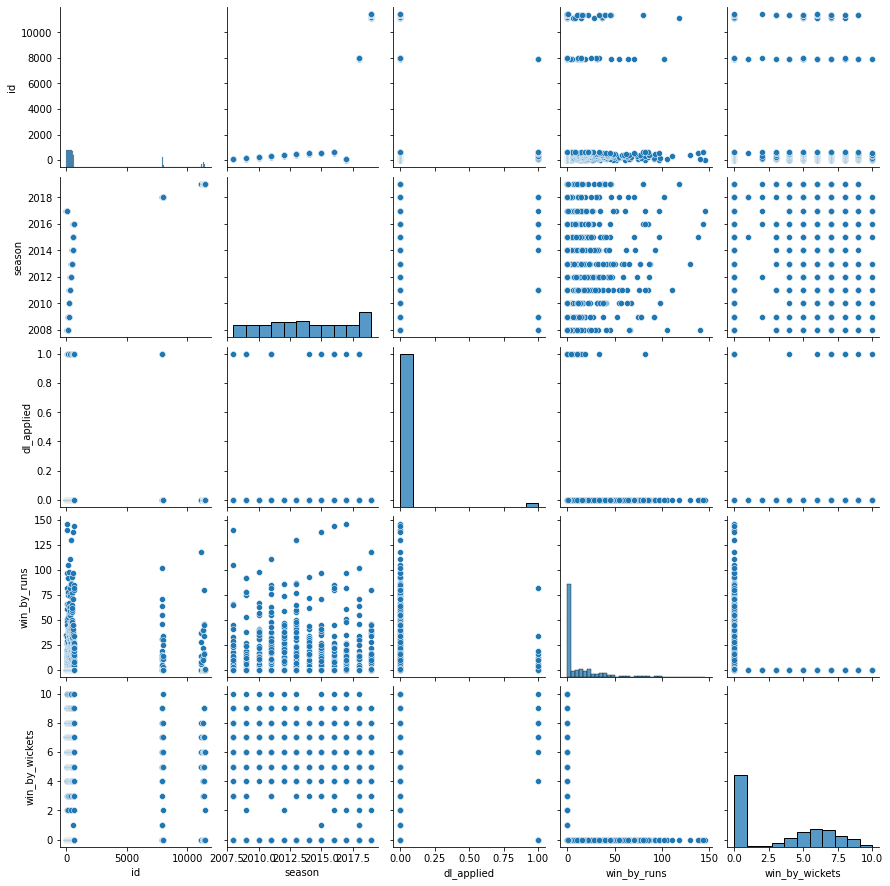

In [ ]:
sns.pairplot(matches_data)

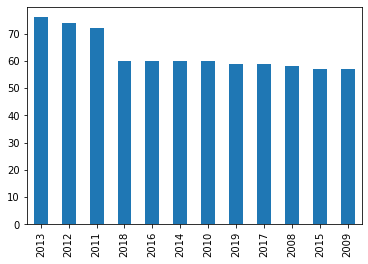

In [ ]:
matches_data['season'].value_counts().plot(kind = 'bar')

From the above graph we can observe that, In 2013 year, more number of matches were played

In [ ]:
matches_data.iloc[matches_data['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

"**Kolkata Knight riders**" is the team which won the matches by more number of wickets

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64


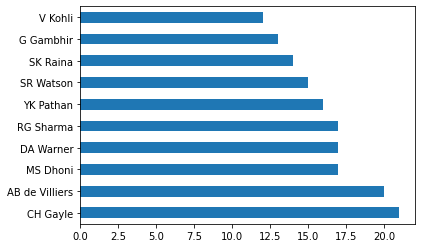

In [ ]:
playerofthe_match = matches_data['player_of_match'].value_counts()[:10]
playerofthe_match.plot(kind='barh')
print(playerofthe_match)

From the above graph, chris gayle won more number of player of match. We can consider him as outstanding player.


In [ ]:
print(matches_data.iloc[[matches_data[matches_data['win_by_runs'].ge(1)]['win_by_runs'].idxmin()]]['winner'])

58    Mumbai Indians
Name: winner, dtype: object


Mumbai Indians won the match with minimum runs


In [ ]:
print(matches_data.iloc[matches_data[matches_data['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner'])

Royal Challengers Bangalore


Royal challengers banglore won the matches with minimum number of wickets

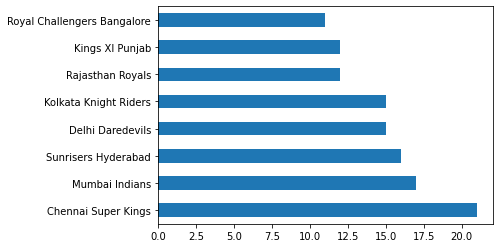

In [ ]:
matches_data.loc[matches_data['season']>=2018 , 'winner'].value_counts().plot(kind='barh')

Chennai Super kings won more number of matches in the last two seasons

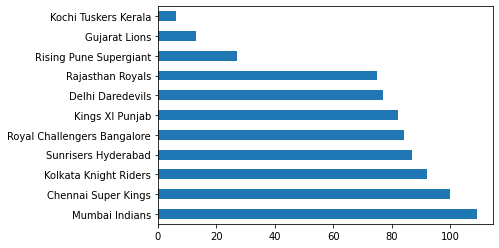

In [ ]:
matches_data.loc[:,'winner'].value_counts().plot(kind='barh')

Considering all seasons mumbai indians won more number of matches

field    460
bat      292
Name: toss_decision, dtype: int64


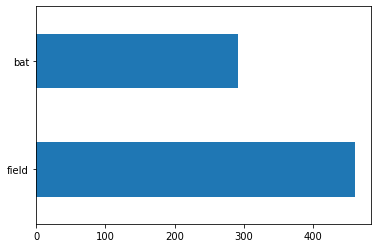

In [ ]:
matches_data['toss_decision'].value_counts().plot(kind='barh')
print(matches_data['toss_decision'].value_counts())

After the toss , more number of times decision has been choosen to field.

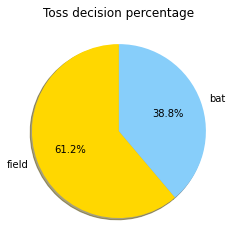

In [ ]:
temp_series = matches_data['toss_decision'].value_counts()
label = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=label, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

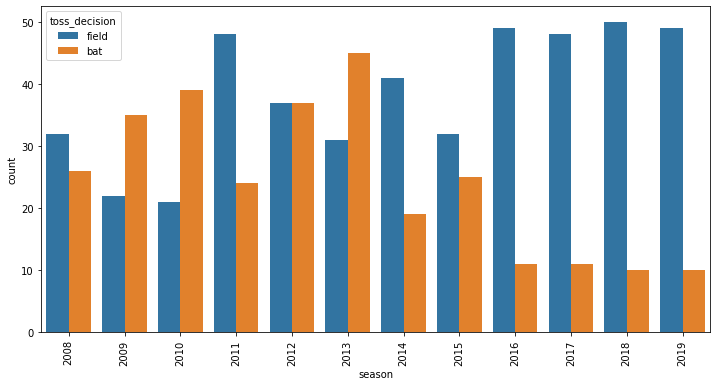

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=matches_data)
plt.xticks(rotation='vertical')
plt.show()

In the last 4 years, field has been choosen more number of times than bat

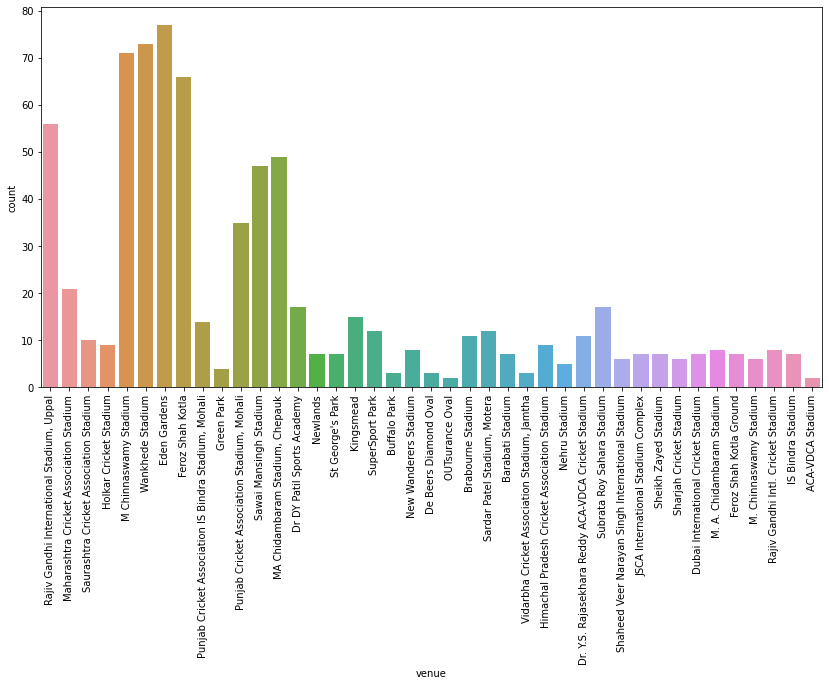

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x='venue',data=matches_data)
plt.xticks(rotation = 'vertical')
plt.show()

From the graph we can observe that more number of matches were occured in **Eden Gardens**

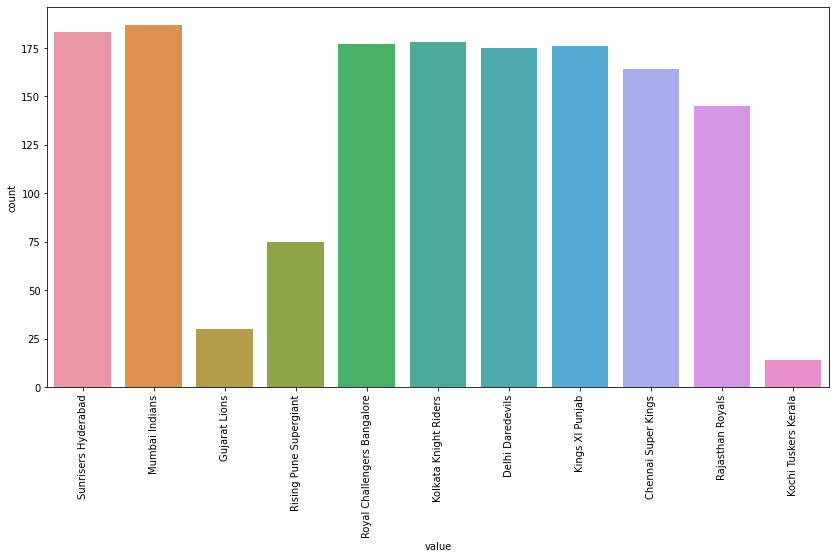

In [ ]:
res = pd.melt(matches_data,id_vars = ['id','season'], value_vars=['team1','team2'])
plt.figure(figsize=(14,7))
sns.countplot(x='value',data = res)
plt.xticks(rotation = 'vertical')
plt.show()

**Mumbai Indians** played most number of matches followed by **Sunrisers Hyderabad**, there are teams like Gujarat lions, Rising pune supergaint, Kochi Tuskers kerala, played less number of matches.

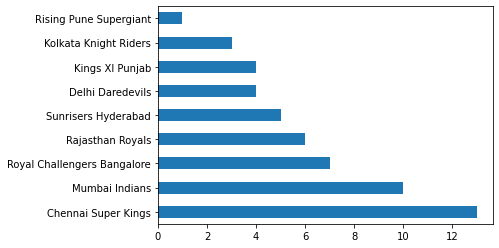

In [ ]:
matches_data.loc[matches_data['win_by_runs']>50 , 'winner'].value_counts().plot(kind = 'barh')

From the above graph, ***chennai super kings*** won the matches by ,more than 50 runs in matches

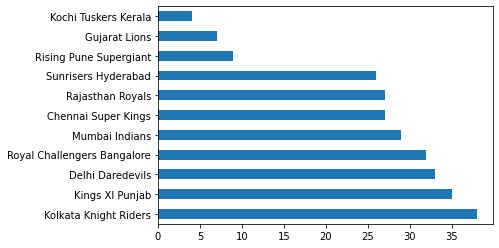

In [ ]:
matches_data.loc[matches_data['win_by_wickets']>5,'winner'].value_counts().plot(kind='barh')

***Kolkata Knight*** riders won the matches by more number of wickets

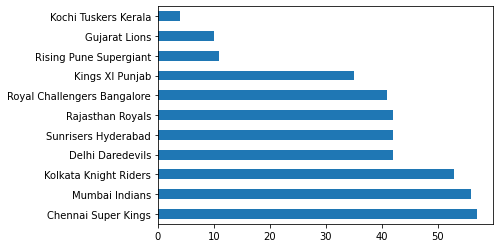

In [ ]:
matches_data.loc[matches_data['toss_winner']==matches_data['winner'],'winner'].value_counts().plot(kind='barh')

Toss winner winning the matches, ***Chennai super kings*** won more
 matches , by winning the toss

In [ ]:
def labeling(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

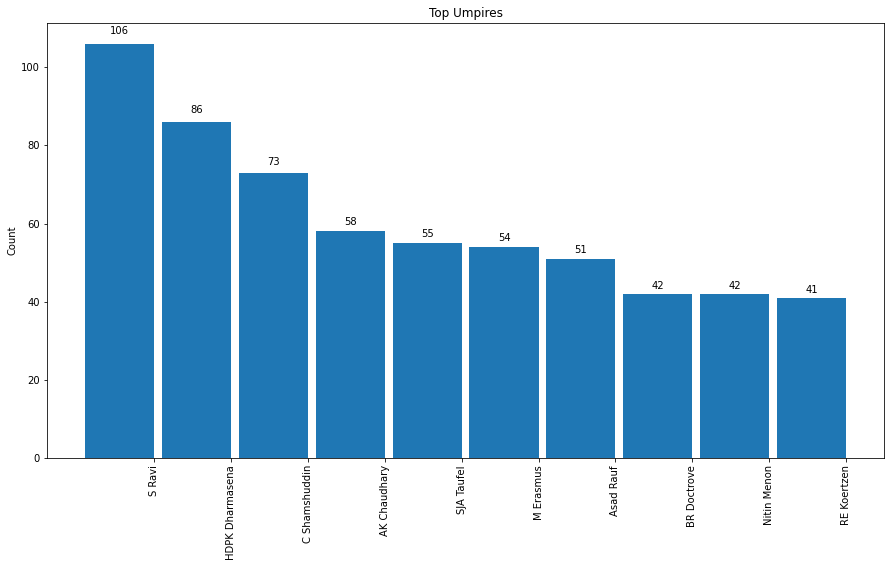

In [ ]:

temp = pd.melt(matches_data,id_vars=['id'],value_vars=['umpire1','umpire2'])
temp_series = temp['value'].value_counts()[:10]
labels = np.array(temp_series.index)
index = np.arange(len(labels))
fig,ax = plt.subplots(figsize=(15,8))
rects = ax.bar(index, np.array(temp_series),width=0.9)
ax.set_xticks(index+((0.9)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
labeling(rects)
plt.show()

***Ravi*** is the most sought after umpire compared to others, He tops the list of all umpires

In [ ]:
temp=matches_data.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
temp

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Sunrisers Hyderabad
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


In [ ]:
deliver_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


Batsman Analysis

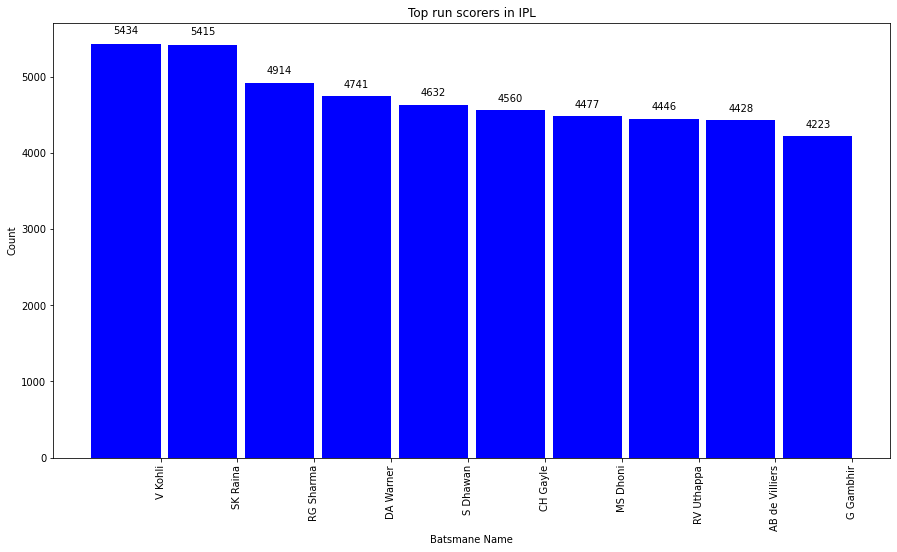

In [ ]:
temp_df = deliver_data.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
ax.set_xlabel('Batsmane Name')
labeling(rects)
plt.show()

Virat Kohli closely followed by SK Raina Scored most number of runs in IPL

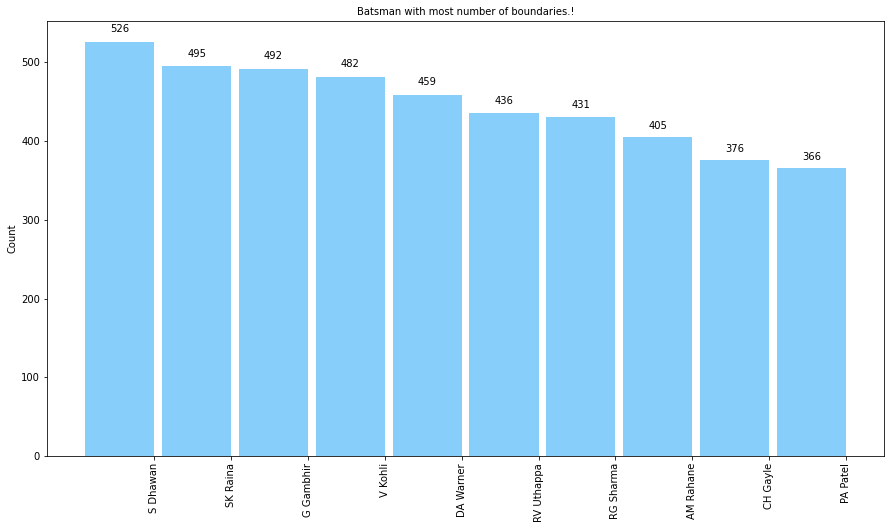

In [ ]:
temp_df = deliver_data.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='lightskyblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of boundaries.!",fontsize = 10)
labeling(rects)
plt.show()

Shikhar dhawan scored more number of boundaries and way ahead of others

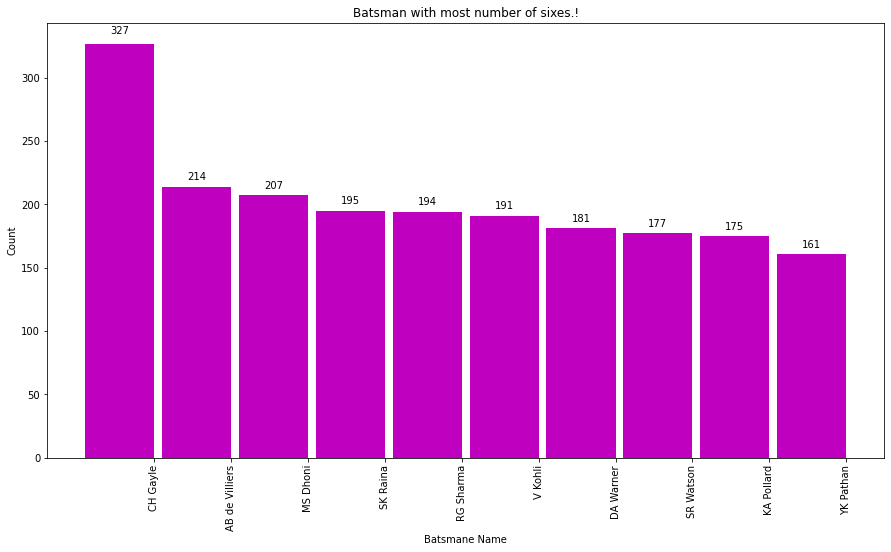

In [ ]:
temp_df = deliver_data.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='m')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of sixes.!")
ax.set_xlabel('Batsmane Name')
labeling(rects)
plt.show()

CH Gayle has scored more number of sixes(327) than anyone, and far ahead of any batsman

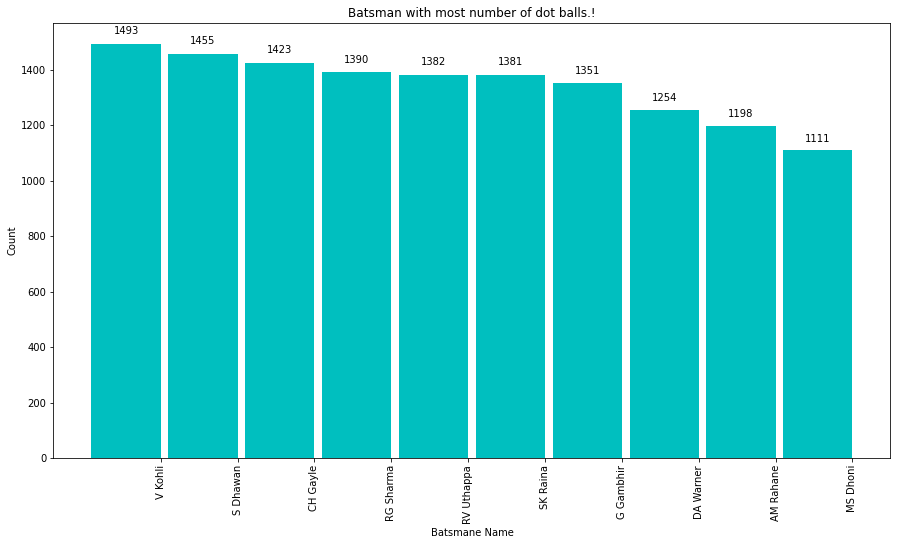

In [ ]:
temp_df = deliver_data.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='c')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of dot balls.!")
ax.set_xlabel('Batsmane Name')
labeling(rects)
plt.show()

Virat kohli has more number of dot balls, as these players have been played more number of balls. Next we will see the dot ball percentage

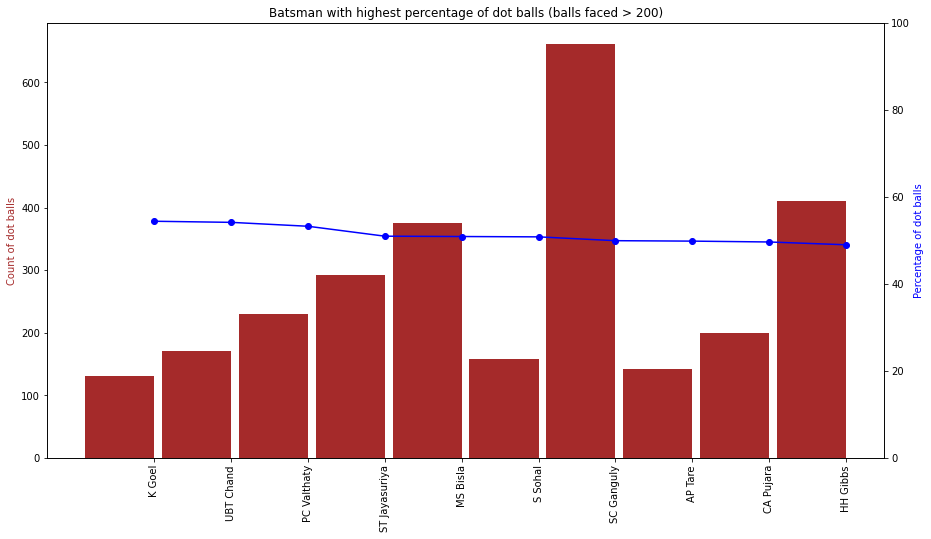

In [ ]:
def balls_faced(x):
    return len(x)

def dot_balls(x):
    return (x==0).sum()

temp_df = deliver_data.groupby('batsman')['batsman_runs'].agg([balls_faced, dot_balls]).reset_index()
temp_df = temp_df.loc[temp_df.balls_faced>200,:]
temp_df['percentage_of_dot_balls'] = (temp_df['dot_balls'] / temp_df['balls_faced'])*100.
temp_df = temp_df.sort_values(by='percentage_of_dot_balls', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

fig, ax1 = plt.subplots(figsize=(15,8))
ax2 = ax1.twinx()
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
rects = ax1.bar(ind, np.array(temp_df['dot_balls']), width=width, color='brown')
ax1.set_xticks(ind+((width)/2.))
ax1.set_xticklabels(labels, rotation='vertical')
ax1.set_ylabel("Count of dot balls", color='brown')
ax1.set_title("Batsman with highest percentage of dot balls (balls faced > 200)")
ax2.plot(ind+0.45, np.array(temp_df['percentage_of_dot_balls']), color='b', marker='o')
ax2.set_ylabel("Percentage of dot balls", color='b')
ax2.set_ylim([0,100])
ax2.grid(b=False)
plt.show()

Batsman who faced more than 200 balls are considered,and we can see the highest percentage of dot balls for batsman. S ganguly has played more than 600 balls and nearly half of them were dot balls. 

**Bowler Analysis**

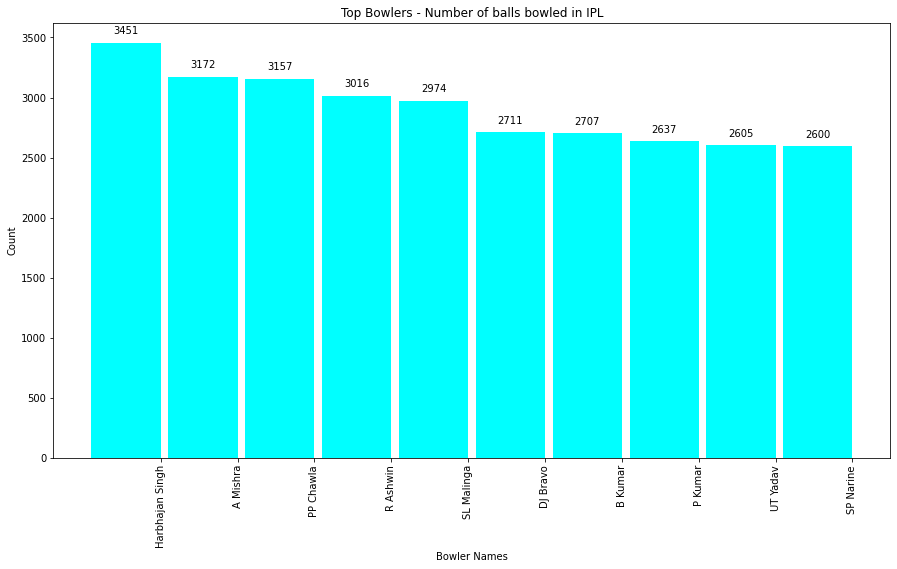

In [ ]:
temp_df = deliver_data.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['ball']), width=width, color='cyan')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
ax.set_xlabel('Bowler Names')
labeling(rects)
plt.show()

Harbajan Singh bowled more number of balls in IPL.

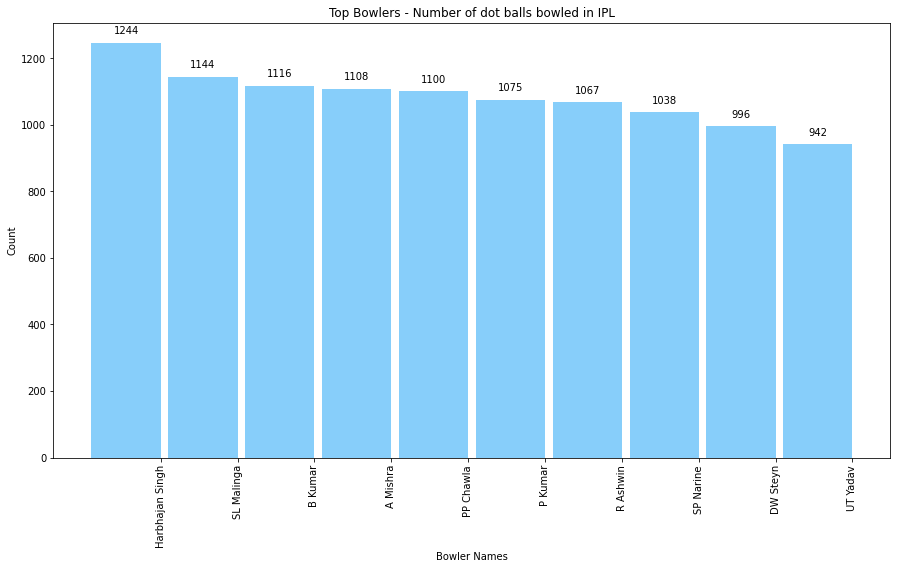

In [ ]:
temp_df = deliver_data.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['total_runs']), width=width, color='lightskyblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of dot balls bowled in IPL")
ax.set_xlabel('Bowler Names')
labeling(rects)
plt.show()

HarBajan Singh tops in both number of balls bowled and number of dot balls 

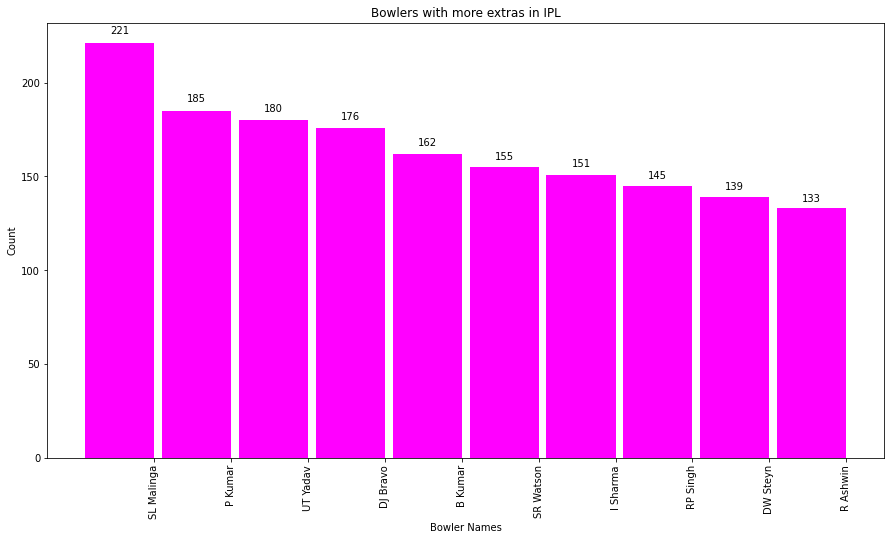

In [ ]:
temp_df = deliver_data.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['extra_runs']), width=width, color='magenta')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowlers with more extras in IPL")
ax.set_xlabel('Bowler Names')
labeling(rects)
plt.show()

SL Malinga bowled more number of extra runs in IPL(221) followed by P kumar, UT Yadav.

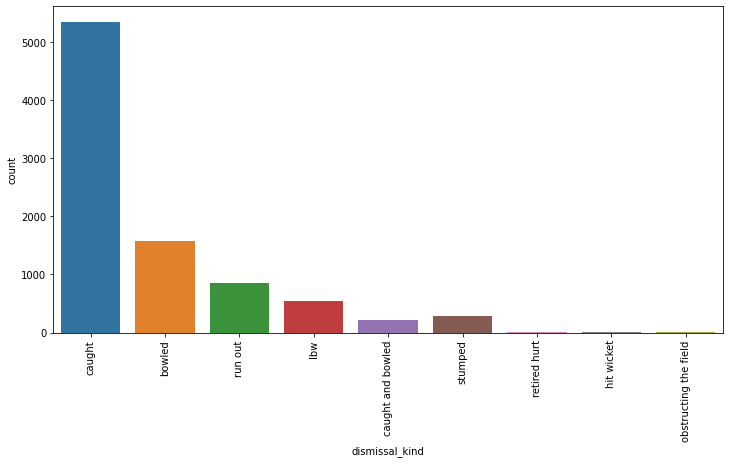

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind', data=deliver_data)
plt.xticks(rotation='vertical')
plt.show()

More Number of dismissals are through Caught, and there were few weird dismissals, hit wicket and obstructing field, very unlucky

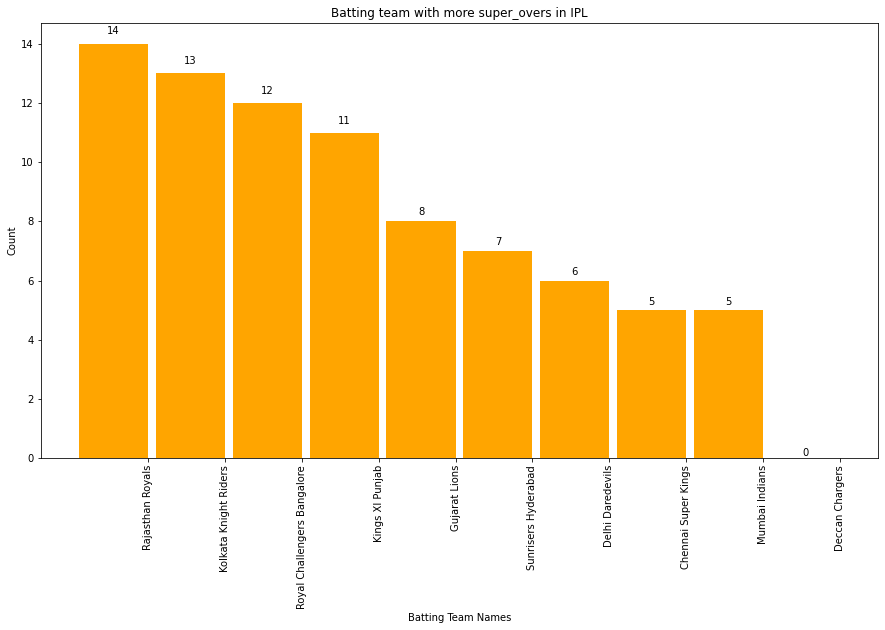

In [ ]:
temp_df = deliver_data.groupby('batting_team')['is_super_over'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='is_super_over', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batting_team'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['is_super_over']), width=width, color='orange')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batting team with more super_overs in IPL")
ax.set_xlabel('Batting Team Names')
labeling(rects)
plt.show()

Being batting team in 2nd innnings and getting a super_over, Rajastan Royals has the most number of super overs , followed by KKR,RCB etc.,


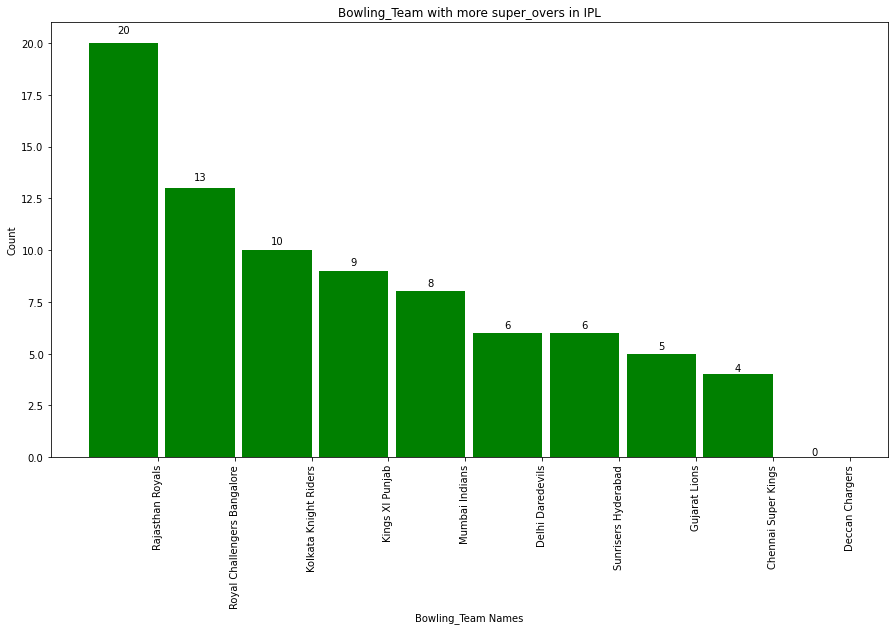

In [ ]:
temp_df = deliver_data.groupby('bowling_team')['is_super_over'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='is_super_over', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowling_team'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['is_super_over']), width=width, color='green')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowling_Team with more super_overs in IPL")
ax.set_xlabel('Bowling_Team Names')
labeling(rects)
plt.show()

In both cases(batting team and bowling team) Rajastan Royals tops the list with high number of super overs.

In [ ]:
len(deliver_data['player_dismissed'].unique())

488

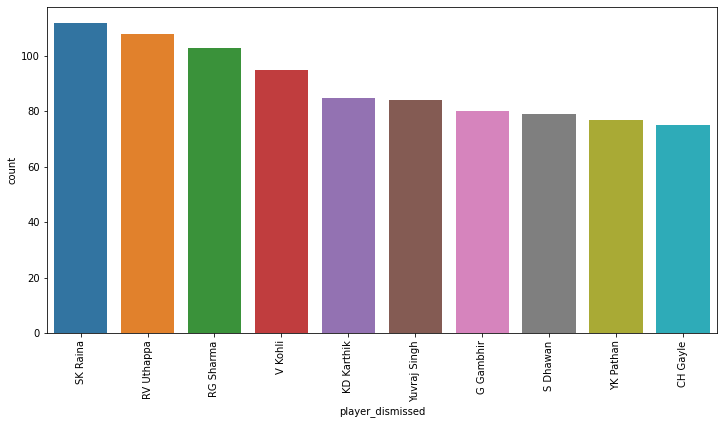

In [ ]:
plt.figure(figsize=(12,6))
temp_df = pd.DataFrame(deliver_data.loc[deliver_data['dismissal_kind']=='caught','player_dismissed'])
sns.countplot(x='player_dismissed',data=temp_df,order=temp_df['player_dismissed'].value_counts().iloc[:10].index)
plt.xticks(rotation='vertical')
plt.show()

Top 10 players who were dismissed through caught

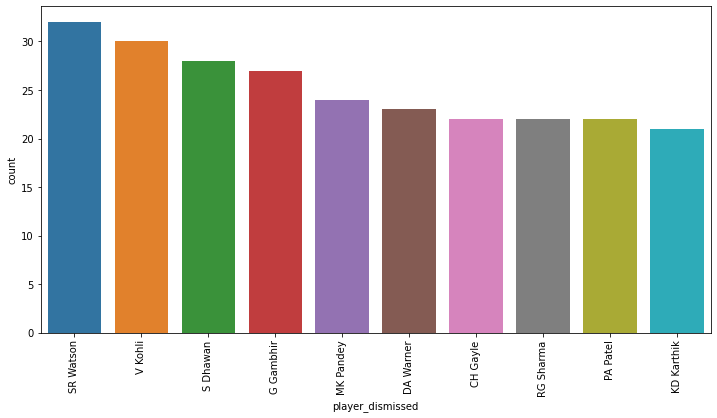

In [ ]:
plt.figure(figsize=(12,6))
temp_df = pd.DataFrame(deliver_data.loc[deliver_data['dismissal_kind']=='bowled','player_dismissed'])
sns.countplot(x='player_dismissed',data=temp_df,order=temp_df['player_dismissed'].value_counts().iloc[:10].index)
plt.xticks(rotation='vertical')
plt.show()

Top 10 players who were dismissed through bowled.